In [2]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.image as mpimg

np.random.seed(42)
%load_ext autoreload
%autoreload 2

# loading and unpacking erp data

In [3]:
erp_data = np.load('erp.npz')
erp=erp_data['erp']
timepoints=erp_data['timepoints']
chan_locs_x=erp_data['chan_locs_x']
chan_locs_y=erp_data['chan_locs_y']
conditions = erp_data['conditions']

# functions

In [9]:
def create_frame(i_timepoint, erp, task_image_map, timepoints, chan_locs_x, chan_locs_y):
    """
    i_timepoint (int): frame of data
    erp (np.array): erp data. Has shape [timepoints, electrodes]
    task_images (np.array(str)): maps task images directories to timing
    timepoints (list): timepoints for trial
    chan_locs_x (list): x-coordinates for EEG electrodes
    chan_locs_y (list): y-coordinates for EEG electrodes
    """
    plt.clf()
    # create grid for interpolation
    grid_x, grid_y = np.mgrid[-1:1:1000j, -1:1:2000j]
    # grab single timepoint
    erp_timepoint = erp[:,i_timepoint]
    # interpolate data across scalp
    interp = interpolate.griddata((chan_locs_y, chan_locs_x),erp_timepoint,(grid_x,grid_y),method='cubic')

    # load task image
    img = mpimg.imread(task_image_map[i_timepoint])

    # plotting 
    fig, ax = plt.subplots(2)
    ax[0].axis('off')
    ax[1].axis('off')

    ax[0].imshow(img)
    ax[1].imshow(interp.T, extent=(0,1,0,1), cmap='coolwarm',vmin=-1,vmax=1)
    ax[1].invert_yaxis() #to make EEG 'head' face the screen

In [12]:
def create_task_image_map(task_images,task_image_timing):
    image_idx = 0
    task_map = np.empty(timepoints.shape,dtype='object')
    for itime,time in enumerate(timepoints):
        if image_idx < len(task_image_timing)-1:
            if time >= task_image_timing[image_idx+1]:
                image_idx +=1
        task_map[itime] = task_images[image_idx]
    return task_map

# creating gif

# showing individual function calls

In [ ]:
task_images = np.array(['images/blank.png','images/array.png','images/blank.png'])
task_image_timing = [-200,0,250]

task_image_map = create_task_image_map(task_images,task_image_timing)
img = mpimg.imread(task_image_map[100])
plt.imshow(img)

<Figure size 432x288 with 0 Axes>

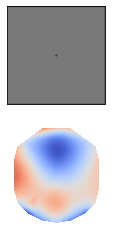

In [199]:
create_frame(i_timepoint=400, erp=erp[0], task_image=img, timepoints=timepoints, chan_locs_x=chan_locs_x, chan_locs_y=chan_locs_y)